<a href="https://colab.research.google.com/github/AchmadWibawa/PCVK/blob/master/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Achmad Wibawa / 01 / 2041720174 / TI 3B

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

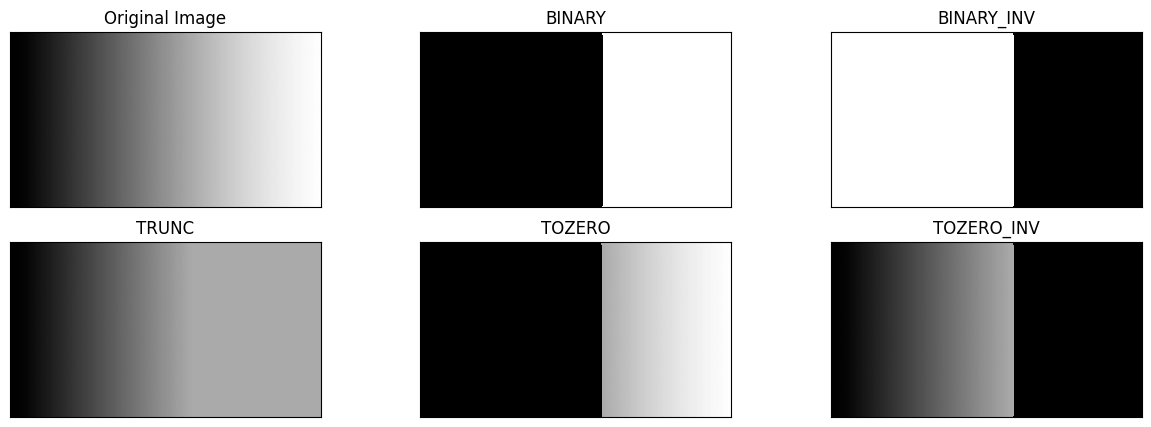

In [3]:
# Load Image
filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img = cv.imread(filename)

# buat fungsi untuk menerapkan Global Threshold secara manual
def global_threshold(img, threshold):
    rows, cols, _ = img.shape 
    thresholded = np.zeros_like(img)
    for i in range(rows):
        for j in range(cols):
            if img[i, j, 0] > threshold:
                thresholded[i, j, :] = 255
            else:
                thresholded[i, j, :] = 0
    return thresholded

# Global Threshold dengan jenis BINARY
binary = global_threshold(img, 170)

# Global Threshold dengan jenis BINARY_INV
binary_inv = 255 - binary

# Global Threshold dengan jenis TRUNC
trunc = np.copy(img)
trunc[trunc > 170] = 170

# Global Threshold dengan jenis TOZERO
tozero = np.copy(img)
tozero[tozero < 170] = 0

# Global Threshold dengan jenis TOZERO_INV
tozero_inv = np.copy(img)
tozero_inv[tozero_inv > 170] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, binary, binary_inv, trunc, tozero, tozero_inv]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

## Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa).

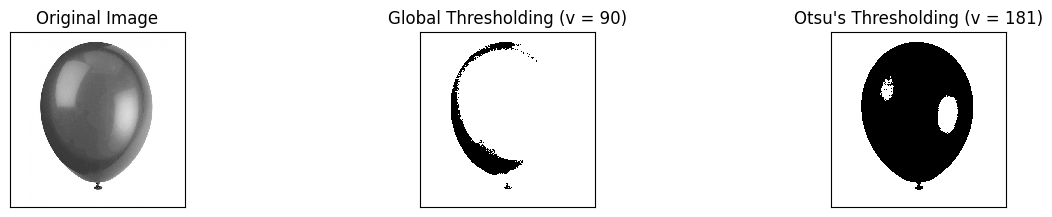

In [4]:

filename2 = '/content/drive/MyDrive/PCVK/Images/balloon.jpg'
img2 = cv.imread(filename2, 0)

hist, bins = np.histogram(img2.flatten(), 256, [0, 256])

hist_norm = hist.astype('float') / np.sum(hist)

cumsum = np.cumsum(hist_norm)
cumsum_norm = cumsum * hist.max()

thresholds = np.arange(256)
between_class_variance = np.zeros(256)
for i in range(0, 250):
    w0 = cumsum[i]
    w1 = 1 - w0
    if w0 == 0 or w1 == 0:
        continue
    mu0 = np.sum(thresholds[:i] * hist_norm[:i]) / w0
    mu1 = np.sum(thresholds[i:] * hist_norm[i:]) / w1
    between_class_variance[i] = w0 * w1 * (mu0 - mu1) ** 2

threshold = np.argmax(between_class_variance)

global_threshold = np.zeros_like(img2)
global_threshold[img2 > 90] = 255

otsu_threshold = threshold
otsu = np.zeros_like(img2)
otsu[img2 > otsu_threshold] = 255

x = ("Otsu's Thresholding (v = ")+str(otsu_threshold)+")" 

titles = ['Original Image','Global Thresholding (v = 90)', x]
images = [img2, global_threshold, otsu]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

## Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.

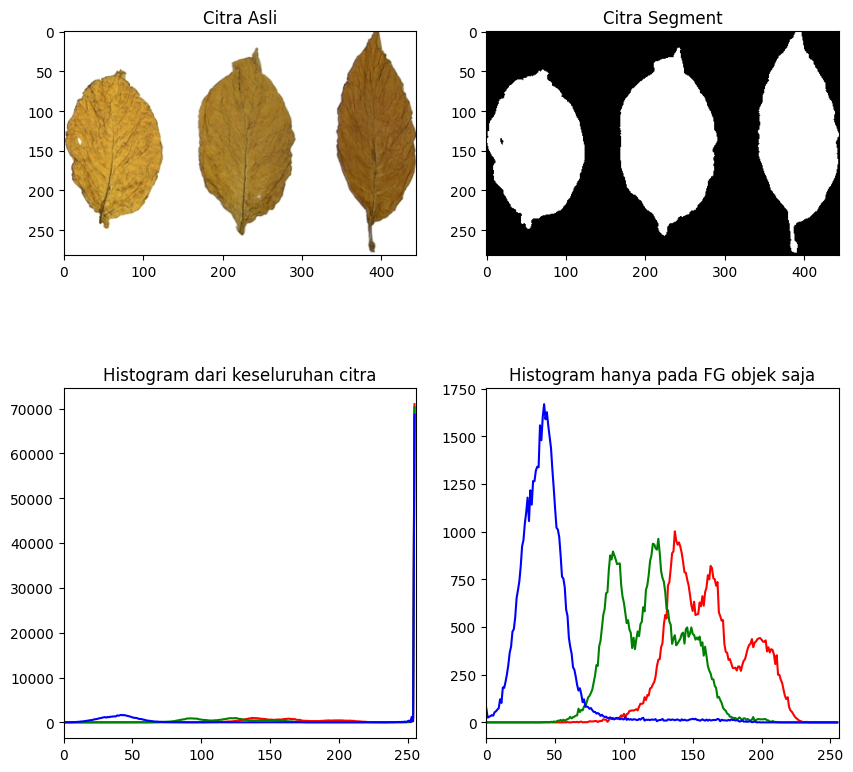

In [87]:
# Membaca gambar dari file
img3 = cv.imread('/content/drive/MyDrive/PCVK/Images/tobacco.jpg')
img3 = cv.cvtColor(img3,cv.COLOR_BGR2RGB) 
img_gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)

_, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

foreground = cv.bitwise_and(img3, img3, mask=mask)

hist_channels = cv.split(foreground)
hist_list = []
for i in range(len(hist_channels)):
    hist = cv.calcHist([hist_channels[i]], [0], None, [256], [0, 256])
    hist_list.append(hist)

plt.figure(figsize = (10,10)) 
plt.subplot(2,2,1),plt.imshow(img3) 
plt.title('Citra Asli') 
plt.subplot(2,2,2),plt.imshow(mask, 'gray') 
plt.title('Citra Segment')

color = ('r', 'g', 'b')
for i, col in enumerate(color):
    hist_full = cv.calcHist([img3], [i], None, [256], [0, 256])
    plt.subplot(2, 2, 3)
    plt.plot(hist_full, color=col)
    plt.xlim([0, 256])
    plt.title('Histogram dari keseluruhan citra')

    hist_fg = cv.calcHist([img3], [i], mask, [256], [0, 256])
    plt.subplot(2, 2, 4)
    plt.plot(hist_fg, color=col)
    plt.xlim([0, 256])
    plt.title('Histogram hanya pada FG objek saja')

plt.show()

## Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

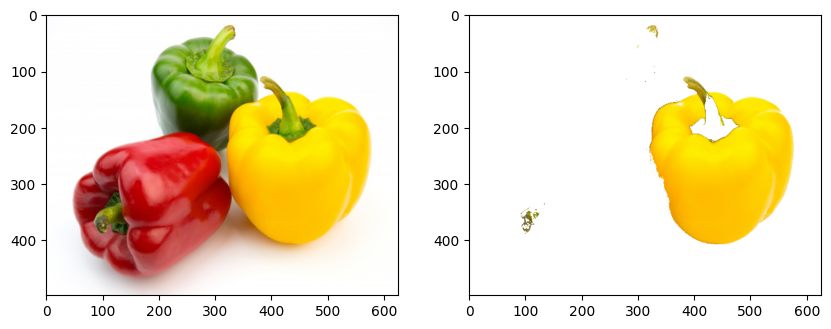

In [121]:
img4 = cv.imread('/content/drive/MyDrive/PCVK/Images/peppers.jpg')

img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)

hsv = cv.cvtColor(img4, cv.COLOR_RGB2HSV)

lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

mask = cv.inRange(hsv, lower_yellow, upper_yellow)

result = cv.bitwise_and(img4, img4, mask=mask)

background = np.ones_like(img4) * 255
background_mask = cv.bitwise_not(mask)
background_result = cv.bitwise_and(background, background, mask=background_mask)

final_result = cv.bitwise_or(result, background_result)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1), plt.imshow(img4)
plt.subplot(1, 2, 2), plt.imshow(final_result)
plt.show()

## Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code dan hasil image di modul ini.

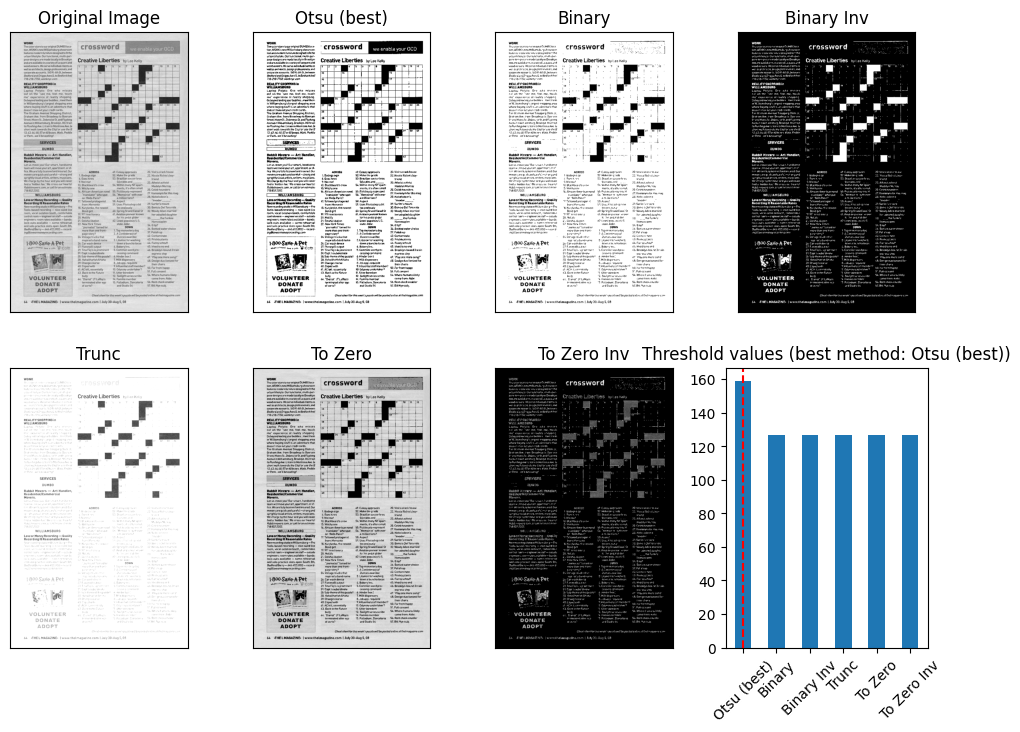

In [144]:
img5 = cv.imread('/content/drive/MyDrive/PCVK/Images/crossword.jpg', cv.IMREAD_GRAYSCALE)

methods = [
    ('Otsu (best)', cv.THRESH_BINARY+cv.THRESH_OTSU),
    ('Binary', cv.THRESH_BINARY),
    ('Binary Inv', cv.THRESH_BINARY_INV),
    ('Trunc', cv.THRESH_TRUNC),
    ('To Zero', cv.THRESH_TOZERO),
    ('To Zero Inv', cv.THRESH_TOZERO_INV)
]
threshold_values = []

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.imshow(img5, 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

for i, (title, method) in enumerate(methods):
    ret, th = cv.threshold(img5, 127, 255, method)
    threshold_values.append(ret)
    
    plt.subplot(2, 4, i+2)
    plt.imshow(th, 'gray')
    plt.title(title)
    plt.xticks([]), plt.yticks([])

best_threshold_index = threshold_values.index(max(threshold_values))
best_threshold = methods[best_threshold_index][0]

plt.subplot(2, 4, 8)
plt.bar([t[0] for t in methods], threshold_values, width=0.5, align='center')
plt.axvline(x=best_threshold, color='r', linestyle='--')
plt.title(f"Threshold values (best method: {best_threshold})")
plt.xticks(rotation=45)

plt.show()